<a href="https://colab.research.google.com/github/karanidenis/transfer_learning_assignment/blob/main/Transfer_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Classification

This project is aimed to use pretrained models with a new dataset to classify different from their images.

## Libraries

In [2]:
!pip install tensorflow keras --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/veges'

### Data Augmentation Configuration and Training Data Generator Initialization

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True,vertical_flip=True, rotation_range=90)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical',
        shuffle=True)

Found 3825 images belonging to 3 classes.


In [9]:
train_generator.class_indices

{'test': 0, 'train': 1, 'validation': 2}

### Libraries for Model Training

In [10]:
from tensorflow.keras.applications import VGG16, InceptionV3, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

## Pretrained Models

In [11]:
# Load pre-trained models
base_models = [VGG16, InceptionV3, VGG19]
pre_models = []

Initialization of Pre-trained Models and Freezing Layers

In [12]:
for base_model in base_models:
    base = base_model(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    pre_models.append(base)

for pretrained_model in pre_models:
    for layer in pretrained_model.layers:
        layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Adding Flatten and Final Dense Layer to Pre-trained Models

In [13]:
models = []
for pretrained_model in pre_models:
    # Converts the multidimensional output of the pretrained model to a one-dimensional vector suitable for the Dense layer.
    last_layer = Flatten()(pretrained_model.output)
    # Adapts the pretrained model to my specific classification task. maps the features extracted by the pretrained model to the desired number of classes (5) using softmax activation for probability output.
    final_layer = Dense(5, activation='softmax')(last_layer)

    model = Model(inputs=pretrained_model.input, outputs=final_layer)
    models.append(model)

## Compile models

### Summary

In [ ]:
for model in models:
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
for model in models:
    model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Training

In [ ]:
# for model in models:
models[0].fit_generator(train_generator, epochs=3)

<ipython-input-11-3105cf94b661>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  models[0].fit_generator(train_generator, epochs=3)


Epoch 1/3
13/13 [==============================] - 542s 43s/step - loss: 1.8960 - accuracy: 0.3221
Epoch 2/3
13/13 [==============================] - 538s 41s/step - loss: 1.0737 - accuracy: 0.5746
Epoch 3/3
13/13 [==============================] - 535s 41s/step - loss: 0.7774 - accuracy: 0.7127


In [ ]:
models[1].fit_generator(train_generator, epochs=3)

<ipython-input-12-a27e9f2a20c4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  models[1].fit_generator(train_generator, epochs=3)


Epoch 1/3
13/13 [==============================] - 120s 9s/step - loss: 18.1521 - accuracy: 0.2587
Epoch 2/3
13/13 [==============================] - 117s 9s/step - loss: 5.5127 - accuracy: 0.4602
Epoch 3/3
13/13 [==============================] - 114s 9s/step - loss: 1.8598 - accuracy: 0.6356


In [ ]:
models[2].fit_generator(train_generator, epochs=3)

<ipython-input-13-f99239e77fe0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  models[2].fit_generator(train_generator, epochs=3)


Epoch 1/3
13/13 [==============================] - 656s 50s/step - loss: 1.9379 - accuracy: 0.3072
Epoch 2/3
13/13 [==============================] - 669s 51s/step - loss: 1.1847 - accuracy: 0.5373
Epoch 3/3
13/13 [==============================] - 665s 51s/step - loss: 0.9938 - accuracy: 0.6157


### Models Evaluation

In [19]:
#TestData
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/veges/test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_batchsize = 64

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224,224),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)


Found 359 images belonging to 36 classes.


In [ ]:
evaluations = []
for model in models:
  evaluations.append(model.evaluate_generator(test_generator))


<ipython-input-15-48f512dded22>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluations.append(model.evaluate_generator(test_generator))


In [ ]:
# Print evaluation results
for i, result in enumerate(evaluations):
    print(f'Model {i+1} - Loss: {result[0]}, Accuracy: {result[1]}')

Model 1 - Loss: 0.8998176455497742, Accuracy: 0.6567164063453674
Model 2 - Loss: 1.1796714067459106, Accuracy: 0.6716417670249939
Model 3 - Loss: 1.0175669193267822, Accuracy: 0.5572139024734497


2/2 [==============================] - 23s 3s/step


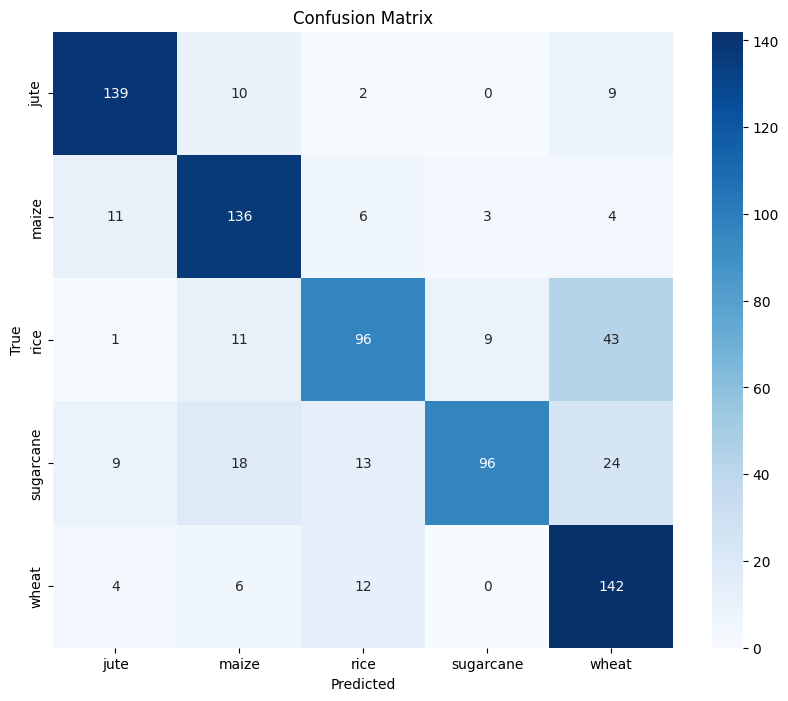

              precision    recall  f1-score   support

        jute       0.85      0.87      0.86       160
       maize       0.75      0.85      0.80       160
        rice       0.74      0.60      0.66       160
   sugarcane       0.89      0.60      0.72       160
       wheat       0.64      0.87      0.74       164

    accuracy                           0.76       804
   macro avg       0.77      0.76      0.75       804
weighted avg       0.77      0.76      0.75       804



In [ ]:
# Assuming train_generator is already defined as per your previous code
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Get the class names
class_names = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']

# Generate predictions for the entire dataset
y_true = []
y_pred = []

# Iterate through the batches generated by train_generator
for i in range(len(train_generator)):
    x_batch, y_batch = train_generator[i]
    y_true_batch = np.argmax(y_batch, axis=1)
    y_pred_batch = np.argmax(models[0].predict(x_batch), axis=1)
    y_true.extend(y_true_batch)
    y_pred.extend(y_pred_batch)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))